September 28, 2020

Code by Jordan Lanius.

#Activity Recognition Project Phase I

##Upload Dataset

In [3]:
from google.colab import files

# Input dataset 'ElderlyActivityDataBed.csv
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [62]:
import pandas as pd
import numpy as np

# Entire database
dataAll = pd.read_csv('ElderlyActivityDataBed.csv', delimiter=',')
# Only data that will be used as input/output
dataImportant = pd.read_csv('ElderlyActivityDataBed.csv', delimiter=',', usecols=(1, 3, 4, 5, 6, 7, 8, 9, 10))
# Only values to numpy array
dataset = np.genfromtxt('ElderlyActivityDataBed.csv', delimiter=",", skip_header=True, usecols=(1, 3, 4, 5, 6, 7, 8, 9, 10))
columnNames = list(dataImportant.columns)

# Get shape of datasets
print(dataAll.shape)
print(dataImportant.shape)
print(dataset.shape)

(52482, 11)
(52482, 9)
(52482, 9)


In [63]:
# Preview the data
print(columnNames)
dataImportant.head()

['Gender', 'FrontalAcceleration', 'VerticalAcceleration', 'LateralAcceleration', 'AntennaID', 'RSSI', 'Phase', 'Frequency', 'Activity']


,Gender,FrontalAcceleration,VerticalAcceleration,LateralAcceleration,AntennaID,RSSI,Phase,Frequency,Activity
0,0,0.27203,1.00820,-0.082102,1,-63.5,2.4252,924.25,0
1,0,0.27203,1.00820,-0.082102,1,-63.0,4.7369,921.75,0
2,0,0.44791,0.91636,-0.013684,1,-63.5,3.0311,923.75,0
3,0,0.44791,0.91636,-0.013684,1,-63.0,2.0371,921.25,0
4,0,0.34238,0.96229,-0.059296,1,-63.5,5.8920,920.25,0


##Clean Data

In [64]:
# Get dataset information
print(dataImportant.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52482 entries, 0 to 52481
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                52482 non-null  int64  
 1   FrontalAcceleration   52482 non-null  float64
 2   VerticalAcceleration  52482 non-null  float64
 3   LateralAcceleration   52482 non-null  float64
 4   AntennaID             52482 non-null  int64  
 5   RSSI                  52482 non-null  float64
 6   Phase                 52482 non-null  float64
 7   Frequency             52482 non-null  float64
 8   Activity              52482 non-null  int64  
dtypes: float64(6), int64(3)
memory usage: 3.6 MB
None


In [65]:
# Clear any empty entries
dataImportant.isnull().values.any()
dataImportant = dataImportant.dropna()

##Data Normalization

In [66]:
# Split dataset into input and output
Input = dataset[:, 0:-1]
Output = dataset[:, -1]

print('Input\n', Input[0:5])
print('\nOutput\n', Output[0:5])

Input
 [[ 0.0000e+00  2.7203e-01  1.0082e+00 -8.2102e-02  1.0000e+00 -6.3500e+01
   2.4252e+00  9.2425e+02]
 [ 0.0000e+00  2.7203e-01  1.0082e+00 -8.2102e-02  1.0000e+00 -6.3000e+01
   4.7369e+00  9.2175e+02]
 [ 0.0000e+00  4.4791e-01  9.1636e-01 -1.3684e-02  1.0000e+00 -6.3500e+01
   3.0311e+00  9.2375e+02]
 [ 0.0000e+00  4.4791e-01  9.1636e-01 -1.3684e-02  1.0000e+00 -6.3000e+01
   2.0371e+00  9.2125e+02]
 [ 0.0000e+00  3.4238e-01  9.6229e-01 -5.9296e-02  1.0000e+00 -6.3500e+01
   5.8920e+00  9.2025e+02]]

Output
 [0. 0. 0. 0. 0.]


In [67]:
# Normalize data
inputMean = Input.mean(axis=0)
Input -= inputMean
inputStd = Input.std(axis=0)
Input /= inputStd

print('Normalized Input\n', Input[0:5])

Normalized Input
 [[-0.96075572 -1.34477336  1.34443021 -0.49710142 -1.07865243 -1.09932601
  -0.37972542  0.87836802]
 [-0.96075572 -1.34477336  1.34443021 -0.49710142 -1.07865243 -0.9908938
   0.65213604 -0.59764394]
 [-0.96075572 -0.9010335   1.14856533 -0.11841511 -1.07865243 -1.09932601
  -0.109273    0.58316562]
 [-0.96075572 -0.9010335   1.14856533 -0.11841511 -1.07865243 -0.9908938
  -0.55295959 -0.89284633]
 [-0.96075572 -1.16728246  1.2465191  -0.37087265 -1.07865243 -1.09932601
   1.167732   -1.48325111]]


In [68]:
# Define functions to quickly normalize and revert data
def normalize(arr):
    return (arr - inputMean) / inputStd

def undoNormalize(arr):
    return (arr * inputStd) + inputMean

##Data Analysis

In [69]:
# Find ratio of output
dataImportant['Activity'].value_counts()

0    46145
1     6337
Name: Activity, dtype: int64

In [70]:
# Find distributions of input features
dataImportant.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,52482.0,0.479993,0.499604,0.00000,0.000000,0.000000,1.000000,1.0000
FrontalAcceleration,52482.0,0.805042,0.396362,-0.74808,0.424460,0.952100,1.128000,1.5032
VerticalAcceleration,52482.0,0.377804,0.468899,-0.55349,-0.025263,0.135500,0.916360,2.0302
LateralAcceleration,52482.0,0.007710,0.180674,-0.48121,-0.093505,-0.025087,0.066138,1.2178
AntennaID,52482.0,2.360752,1.261542,1.00000,1.000000,3.000000,4.000000,4.0000
RSSI,52482.0,-58.430814,4.611220,-70.00000,-61.500000,-57.500000,-56.500000,-38.5000
Phase,52482.0,3.275907,2.240341,0.00000,0.951070,4.072700,5.425700,6.2817
Frequency,52482.0,922.762261,1.693769,920.25000,921.250000,922.750000,924.250000,925.7500
Activity,52482.0,0.120746,0.325835,0.00000,0.000000,0.000000,0.000000,1.0000


In [71]:
# Shuffle the data
from sklearn.utils import shuffle
dataImportant = shuffle(dataImportant)
dataImportant.head()

,Gender,FrontalAcceleration,VerticalAcceleration,LateralAcceleration,AntennaID,RSSI,Phase,Frequency,Activity
45323,1,1.10450,0.055119,-0.082102,4,-62.0,0.38810,921.75,0
17193,0,0.96383,-0.002297,-0.025087,1,-58.0,6.27400,920.75,0
4505,1,0.67069,0.801520,0.111750,2,-57.0,0.18715,920.75,1
13838,0,0.95210,-0.117130,-0.150520,3,-48.5,4.59430,921.75,0
49137,1,0.92865,0.146980,-0.173330,3,-50.0,3.85950,921.25,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f22c9054438>]],
      dtype=object)

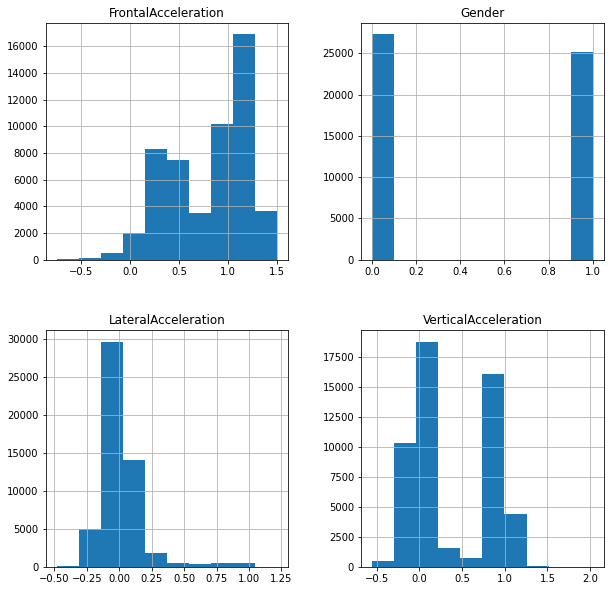

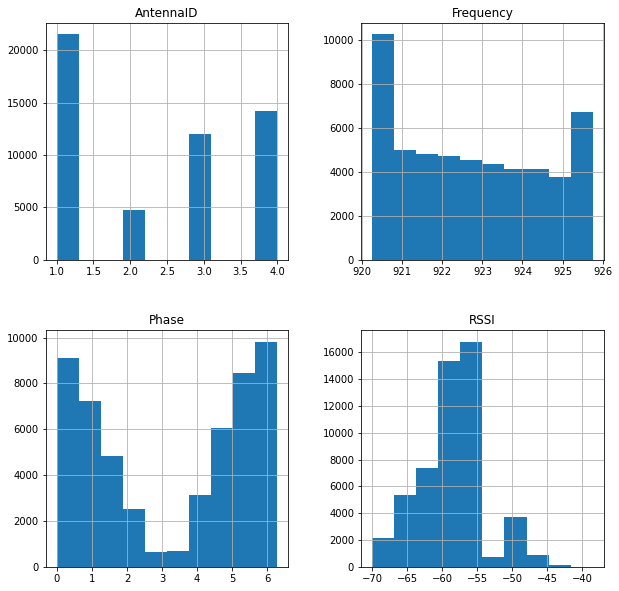

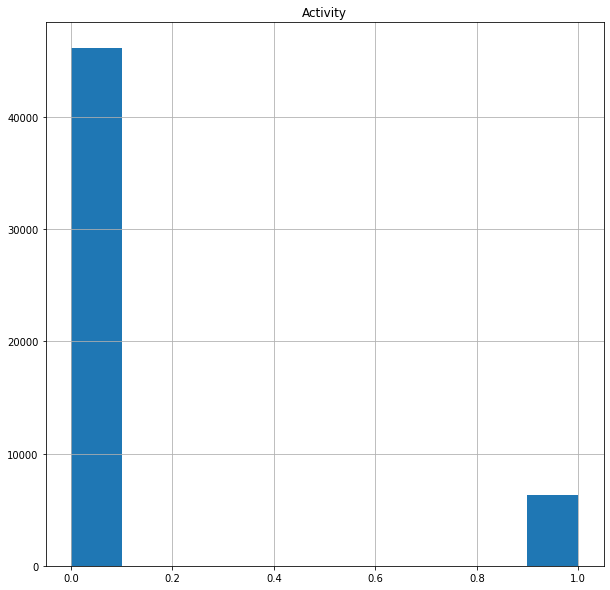

In [72]:
# Get histograms of input and output columns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = ((10,10))
dataImportant.hist(column=['Gender', 'FrontalAcceleration', 'VerticalAcceleration', 'LateralAcceleration'], layout=(2,2))
dataImportant.hist(column=['AntennaID', 'RSSI', 'Phase', 'Frequency'])
dataImportant.hist(column=['Activity'])

##Verify Normalization

In [81]:
# Create new dataframe
normalizedData = pd.DataFrame(data = Input,
                              columns = columnNames[0:-1])
revertedData = pd.DataFrame(data = undoNormalize(Input),
                            columns = columnNames[0:-1])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f22d0ad6f60>]],
      dtype=object)

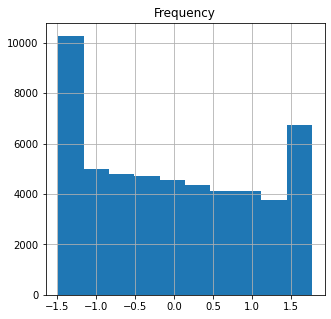

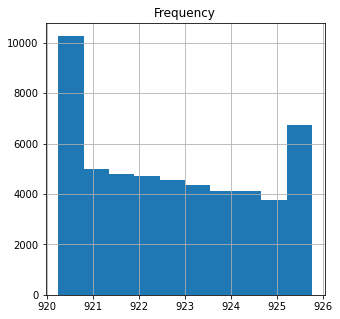

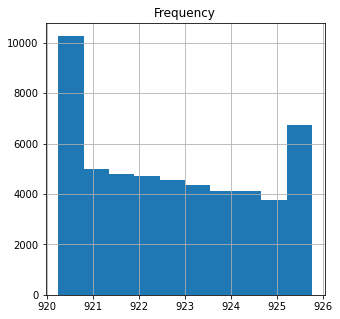

In [86]:
# Get histograms of input columns from numpy array that has been normalized
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = ((5,5))

# Normalized
normalizedData.hist(column='Frequency')
# Reverted
revertedData.hist(column='Frequency')
# Original
dataImportant.hist(column='Frequency')